In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
from easydict import EasyDict as edict
%matplotlib inline

In [3]:
resDir = Path("./demoResults")
dataDir = Path("./demoData")

In [4]:
filname = Path("demoMEG.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [5]:
paras = edict()
paras.Lmin = 200
paras.wh = 10
paras.MaxM = 20
paras.fct = 0.5
paras.r = None
paras.freq = 120
paras.lamb = 1e-2
paras.T = 2
paras.is_detrend = True
paras.decimateRate = 5
paras.kappa = 3.005
paras.downRate = 20

In [6]:
detRawNo = TVDNDetect(Ymat=MEG, dataType="MEG", 
                     saveDir="./demoResults", 
                     fName="demoMEG",
                     showProgress=True, 
                     MaxM=paras.MaxM,
                     Lmin=paras.Lmin, 
                     lamb=paras.lamb, 
                     kappa=paras.kappa, 
                     freq=paras.freq,
                     r=paras.r,
                     T=paras.T,
                     is_detrend=paras.is_detrend,
                     decimateRate=paras.decimateRate, 
                     downRate=paras.downRate)

The parameters for detection are:
{'Lmin': 200,
 'MaxM': 20,
 'T': 2,
 'decimateRate': 5,
 'downRate': 20,
 'fName': 'demoMEG',
 'fct': 0.5,
 'freq': 120,
 'is_detrend': True,
 'kappa': 3.005,
 'lamb': 0.01,
 'nKnots': None,
 'nbasis': 10,
 'r': None}


## Run the Main Function without screening

In [7]:
detRawNo()

R[write to console]: 
载入程辑包：‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly


/home/huaqingj/MyResearch/TVDN/pyTVDN/TVDNclass.py:294: UserWarning: As loading the saved results, kappa will be ignored
  warnings.warn("As loading the saved results, kappa will be ignored", UserWarning)


## Run the Main Function with screening

In [8]:
detRaw = TVDNDetect(Ymat=MEG, dataType="MEG", 
                     saveDir=None,
                     fName="demoMEG",
                     showProgress=True, 
                     MaxM=paras.MaxM,
                     Lmin=paras.Lmin, 
                     lamb=paras.lamb, 
                     kappa=paras.kappa, 
                     freq=paras.freq,
                     r=paras.r,
                     T=paras.T,
                     is_detrend=paras.is_detrend,
                     decimateRate=paras.decimateRate, 
                     downRate=paras.downRate)

The parameters for detection are:
{'Lmin': 200,
 'MaxM': 20,
 'T': 2,
 'decimateRate': 5,
 'downRate': 20,
 'fName': 'demoMEG',
 'fct': 0.5,
 'freq': 120,
 'is_detrend': True,
 'kappa': 3.005,
 'lamb': 0.01,
 'nKnots': None,
 'nbasis': 10,
 'r': None}


In [9]:
detRaw.Screening(wh=paras.wh)
detRaw()

Dynamic Programming: 100%|██████████| 226/226 [00:13<00:00, 16.73it/s]


## Compare the results

In [10]:
print(detRaw)
print(detRawNo)

+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 883 1588 2544 3284 4835 6457 6844] | 1.8489834221702357 |  5   |
+-------------+--------------------------------------+--------------------+------+
+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 875 1594 2536 3283 4855 6446 6841] | 2.9709137751949912 |  5   |
+-------------+--------------------------------------+--------------------+------+


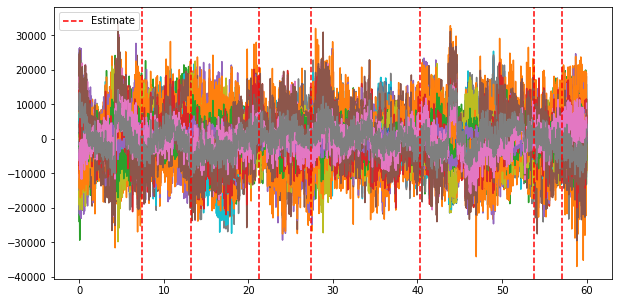

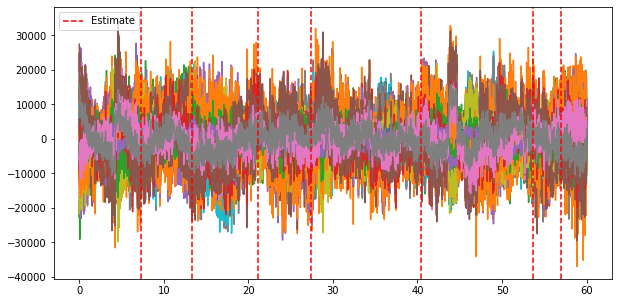

In [11]:
detRaw.PlotEcpts()
detRawNo.PlotEcpts()